<딥러닝 응용기법>
--

Climate
--

In [ ]:
from google.colab import files
files.upload()

1번 문제: 딥러닝 모델링을 적용하기 전에 데이터 처리를 하시오.
--

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd
climate=pd.read_csv('._jena_climate_2009_2016.csv')
df=pd.read_csv('jena_climate_2009_2016.csv', parse_dates=['Date Time'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,2016-12-31 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


분포 확인하기

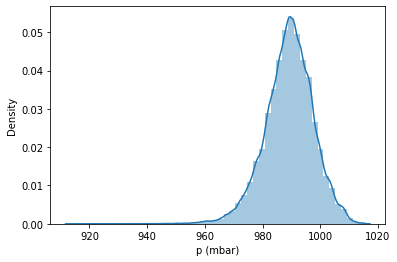

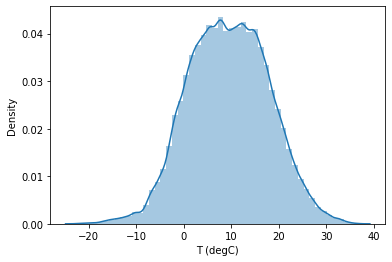

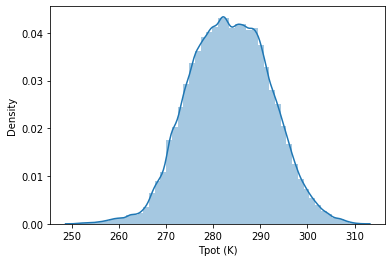

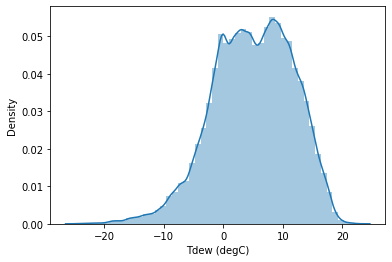

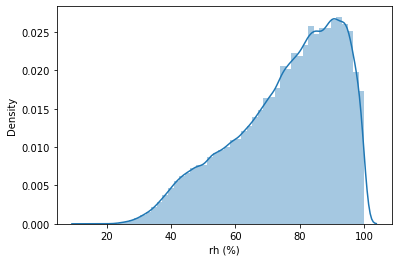

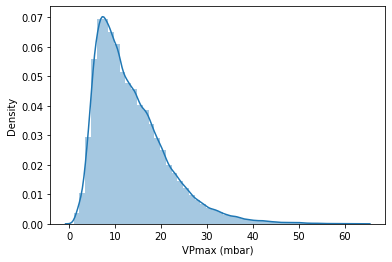

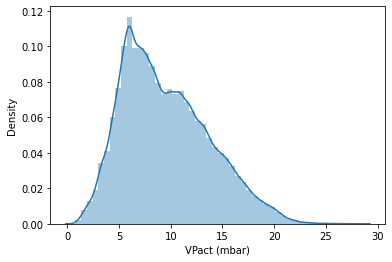

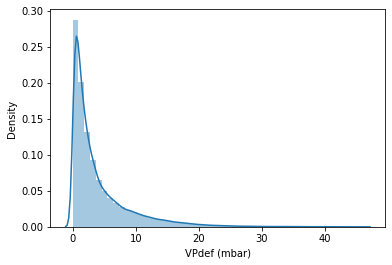

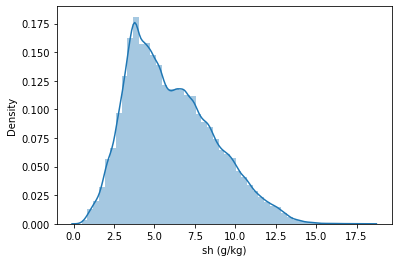

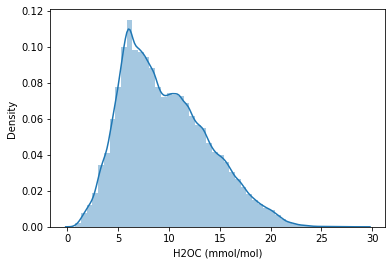

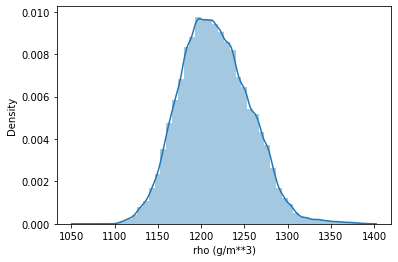

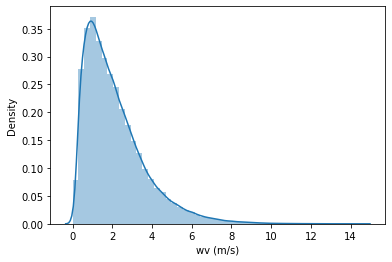

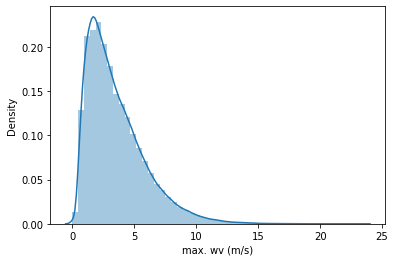

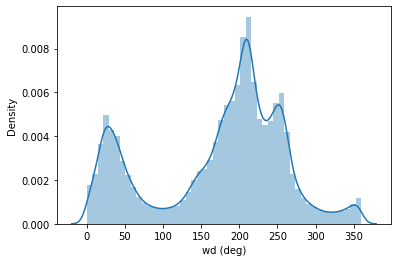

In [ ]:
for i in range(1,15):
    y=df.iloc[:, i]
    sns.distplot(y)
    plt.show()

분포중에 정규분포 형태가 아닌 분포들이 있으므로 scaler를 적용해줍니다.

In [ ]:
df_1=df.iloc[:, 1:]

In [ ]:
x=df_1.drop(['wd (deg)'], axis=1)
y=df_1[['wd (deg)']]

In [ ]:
from sklearn.preprocessing import RobustScaler

robust=RobustScaler()

robust.fit(x)
x=robust.fit_transform(x)

robust.fit(y)
y=robust.fit_transform(y)

2번 문제: 평가지표를 정의한 다음 정의가 타당한지 서술하고 함수로 코드를 작성하시오.
--

In [ ]:
df['time'] = df['Date Time'].dt.strftime('%Y%m%d')
df['year'] = df['Date Time'].dt.strftime('%Y')
df['year_month'] = df['Date Time'].dt.strftime('%Y%m')
df['month_day'] = df['Date Time'].dt.strftime('%m%d')
df['month']=df['Date Time'].dt.strftime('%m')
df['date']=df['Date Time'].dt.strftime('%d')
df['hour']=df['Date Time'].dt.strftime('%H')
df['minute']=df['Date Time'].dt.strftime('%M')
df['day']=df['Date Time'].dt.strftime('%A')

In [ ]:
df['time'] = df['time'].astype(float)
df['year'] = df['year'].astype(float)
df['year_month'] = df['year_month'].astype(float)
df['month_day'] = df['month_day'].astype(float)
df['month']=df['month'].astype(float)
df['date']=df['date'].astype(float)
df['hour']=df['hour'].astype(float)
df['minute']=df['minute'].astype(float)

In [ ]:
time_df=df.copy()

In [ ]:
time_df=time_df.set_index('Date Time')

2016년 12월 이전까지 학습시켜서, 2016년 12월 맞춰보기

In [ ]:
time_df.loc[time_df['year_month']==201612]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),time,year,year_month,month_day,month,date,hour,minute,day
Date Time,,,,,,,,,,,,,,,,,,,,,,,
2016-12-01 00:00:00,962.50,4.13,280.34,2.49,89.00,8.21,7.31,0.90,4.74,7.59,1205.72,3.26,5.01,204.0,20161201.0,2016.0,201612.0,1201.0,12.0,1.0,0.0,0.0,Thursday
2016-12-01 00:10:00,962.55,4.02,280.22,2.38,89.00,8.15,7.25,0.90,4.70,7.53,1206.29,3.08,5.13,211.8,20161201.0,2016.0,201612.0,1201.0,12.0,1.0,0.0,10.0,Thursday
2016-12-01 00:20:00,962.48,4.11,280.32,2.47,89.00,8.20,7.30,0.90,4.73,7.58,1205.77,3.36,4.69,216.2,20161201.0,2016.0,201612.0,1201.0,12.0,1.0,0.0,20.0,Thursday
2016-12-01 00:30:00,962.47,4.20,280.41,2.51,88.70,8.25,7.32,0.93,4.74,7.60,1205.38,3.10,4.41,217.3,20161201.0,2016.0,201612.0,1201.0,12.0,1.0,0.0,30.0,Thursday
2016-12-01 00:40:00,962.58,4.25,280.46,2.53,88.50,8.28,7.33,0.95,4.75,7.62,1205.28,3.33,4.49,214.5,20161201.0,2016.0,201612.0,1201.0,12.0,1.0,0.0,40.0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,1000.11,-3.93,269.23,-8.09,72.60,4.56,3.31,1.25,2.06,3.31,1292.41,0.56,1.00,202.6,20161231.0,2016.0,201612.0,1231.0,12.0,31.0,23.0,10.0,Saturday
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0,20161231.0,2016.0,201612.0,1231.0,12.0,31.0,23.0,20.0,Saturday
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3,20161231.0,2016.0,201612.0,1231.0,12.0,31.0,23.0,30.0,Saturday


In [ ]:
train=time_df.loc[time_df['year_month']<=201612]
test=time_df.loc[time_df['year_month']==201612]

In [ ]:
train.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'time', 'year', 'year_month', 'month_day', 'month', 'date',
       'hour', 'minute', 'day'],
      dtype='object')

In [ ]:
train.drop(['time','year', 'year_month', 'month', 'month_day', 'day','date','hour','minute'], axis=1, inplace=True)
test.drop(['time','year', 'year_month', 'month', 'month_day','day','date','hour','minute'], axis=1, inplace=True)

In [ ]:
train

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,1000.11,-3.93,269.23,-8.09,72.60,4.56,3.31,1.25,2.06,3.31,1292.41,0.56,1.00,202.6
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3


In [ ]:
test

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2016-12-01 00:00:00,962.50,4.13,280.34,2.49,89.00,8.21,7.31,0.90,4.74,7.59,1205.72,3.26,5.01,204.0
2016-12-01 00:10:00,962.55,4.02,280.22,2.38,89.00,8.15,7.25,0.90,4.70,7.53,1206.29,3.08,5.13,211.8
2016-12-01 00:20:00,962.48,4.11,280.32,2.47,89.00,8.20,7.30,0.90,4.73,7.58,1205.77,3.36,4.69,216.2
2016-12-01 00:30:00,962.47,4.20,280.41,2.51,88.70,8.25,7.32,0.93,4.74,7.60,1205.38,3.10,4.41,217.3
2016-12-01 00:40:00,962.58,4.25,280.46,2.53,88.50,8.28,7.33,0.95,4.75,7.62,1205.28,3.33,4.49,214.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,1000.11,-3.93,269.23,-8.09,72.60,4.56,3.31,1.25,2.06,3.31,1292.41,0.56,1.00,202.6
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3


이번에는 MinMax Scaler 사용

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()

minmax.fit(train)
train_trans=minmax.fit_transform(train)

minmax.fit(test)
test_trans=minmax.fit_transform(test)

In [ ]:
train=pd.DataFrame(train_trans, index=train.index, columns=train.columns)

In [ ]:
test=pd.DataFrame(test_trans, index=test.index, columns=test.columns)

In [ ]:
train

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,0.814939,0.248632,0.243662,0.334788,0.923033,0.037886,0.084272,0.004782,0.081679,0.082798,0.743213,0.070403,0.074468,0.423056
2009-01-01 00:20:00,0.815430,0.242163,0.237241,0.326891,0.924182,0.036294,0.081003,0.004564,0.078843,0.079586,0.749349,0.049214,0.063830,0.378056
2009-01-01 00:30:00,0.815037,0.240504,0.235594,0.326268,0.929925,0.035976,0.080639,0.004347,0.078276,0.079229,0.750666,0.012987,0.026809,0.476667
2009-01-01 00:40:00,0.814840,0.243822,0.239052,0.331255,0.933372,0.036772,0.082819,0.004130,0.080545,0.081370,0.747523,0.023240,0.021277,0.550000
2009-01-01 00:50:00,0.814840,0.244485,0.239546,0.331879,0.932223,0.036931,0.083182,0.004130,0.080545,0.081727,0.746954,0.021873,0.026809,0.595278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,0.850221,0.316470,0.306717,0.351621,0.685238,0.057466,0.091537,0.027168,0.088486,0.089579,0.697297,0.038278,0.042553,0.562778
2016-12-31 23:20:00,0.849828,0.314480,0.304577,0.350790,0.690982,0.056829,0.091173,0.026516,0.088486,0.089222,0.699003,0.045796,0.064681,0.666667
2016-12-31 23:30:00,0.848452,0.326091,0.316266,0.352244,0.652039,0.060809,0.091900,0.031298,0.089053,0.089936,0.688407,0.077922,0.081702,0.650833


In [ ]:
test

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2016-12-01 00:00:00,0.000567,0.287958,0.367688,0.473173,0.846907,0.108294,0.286367,0.027411,0.301751,0.302326,0.421257,0.368669,0.374302,0.566606
2016-12-01 00:10:00,0.001513,0.285079,0.364649,0.468896,0.846907,0.106872,0.282453,0.027411,0.297631,0.298450,0.424281,0.347468,0.383879,0.588276
2016-12-01 00:20:00,0.000189,0.287435,0.367182,0.472395,0.846907,0.108057,0.285714,0.027411,0.300721,0.301680,0.421522,0.380448,0.348763,0.600500
2016-12-01 00:30:00,0.000000,0.289791,0.369461,0.473950,0.842172,0.109242,0.287019,0.028426,0.301751,0.302972,0.419452,0.349823,0.326417,0.603556
2016-12-01 00:40:00,0.002080,0.291099,0.370727,0.474728,0.839015,0.109953,0.287671,0.029103,0.302781,0.304264,0.418922,0.376914,0.332801,0.595777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,0.711800,0.076963,0.086351,0.061820,0.588068,0.021801,0.025440,0.039255,0.025747,0.025840,0.881248,0.050648,0.054270,0.562717
2016-12-31 23:20:00,0.711044,0.073822,0.083059,0.060264,0.595960,0.020853,0.024788,0.038240,0.025747,0.025194,0.884273,0.063604,0.095770,0.666620
2016-12-31 23:30:00,0.708396,0.092147,0.101038,0.062986,0.542456,0.026777,0.026093,0.045685,0.026777,0.026486,0.865489,0.118963,0.127694,0.650785


In [ ]:
x=train.drop(['wd (deg)'], axis=1)
y=train[['wd (deg)']]

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=seed)

In [ ]:
# 모델 설정
model=Sequential()
model.add(Dense(24, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

평가지표

오차 함수 : Mean_squared_error 사용

1) 오차함수의 대표적인 종류로는 평균 제곱계열과 교차 엔트로피 계열이 있다. 교차 엔트로피 계열의 경우 예측 값이 참과 거짓 둘 중 하나인 형식으로 범주형 혹은 이진분류형에 적합하다. 본 문제의 target은 420450개의 행중에 9893개의 유니크한 값을 가지고 있으므로, 범주형으로 평가하기에 부적합하다. 이에 따라 평균 제곱 계열 중 하나인 mean_squared_error로 compile한다.

2) 오차를 어떻게 줄여나갈지 정하는 함수를 optimizer라고 하는데, SGD, Adam, RMSprop 등등 중에 Adam을 썻다. 그 이유로는 Momentum과 Adagrad는 각각 가중치가 학습 초반에 0으로 biased되는 문제가 있는데, 이 문제를 해결하기에 Adam이 적합하다고 판단했기 때문이다.

https://ganghee-lee.tistory.com/24

아래 코드를 보듯, 마지막으로 y_test(실제값), y_pred(예측값)을 출력한 뒤에는 SMAPE함수로 코드를 작성하고 나서, 한 번 더 검증을 진행하였다.
모형의 평가 지표로 MSE 이 외에도 MAPE가 있는데,  MSE는 과적합된 모형에 좋은 점수를 주게 될 가능성이 크다. 이에 따라 실제값에 상대적으로 모형을 평가하는 MAPE로 다시 한 번 평가하려했으나, MAPE는 실제 값이 0과 가까워질수록 오차의 영향력이 무한대로 커진다는 점이다.

이를 보완하기 위해 SMAPE로 한 번 더 평가하였다.

SMAPE란 MAPE의 이런 단점을 해결하기 위해 분모의 y_test(실제값)을 y_test(실제값)+y_pred(예측값)으로 수정하여 실제값과 예측값이 바뀌어도 동일한 값을 산출한다.

 http://ds.sumeun.org/?p=2190

3) metrics를 accuracy으로 설정한 이유도 1번의 이유와 비슷하다. AUC, BinaryCrossentropy 등등을 metrics로 설정하기엔 본 문제보다는 분류 문제가 적합하다고 판단하였기 때문에, 본 문제에서는 accuracy를 metrics로 설정하였다.

In [ ]:
import numpy as np
def smape(a, f):
    return 1/len(a)*np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f))*100)

In [ ]:
smape(y_test, y_pred)

wd (deg)    64.190163
dtype: float64

3번 문제: 딥러닝을 Dense로만 쌓고, 결과를 해석하시오.
--

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 24)                336       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                250       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 597
Trainable params: 597
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습하기
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 50,
                    validation_data = (x_val,y_val))

Epoch 1/10
6728/6728 [==============================] - 16s 2ms/step - loss: 0.0545 - accuracy: 7.0330e-04 - val_loss: 0.0506 - val_accuracy: 9.8704e-04
Epoch 2/10
6728/6728 [==============================] - 14s 2ms/step - loss: 0.0505 - accuracy: 9.3678e-04 - val_loss: 0.0497 - val_accuracy: 9.8704e-04
Epoch 3/10
6728/6728 [==============================] - 15s 2ms/step - loss: 0.0497 - accuracy: 9.5341e-04 - val_loss: 0.0496 - val_accuracy: 9.8704e-04
Epoch 4/10
6728/6728 [==============================] - 15s 2ms/step - loss: 0.0495 - accuracy: 0.0011 - val_loss: 0.0496 - val_accuracy: 9.9893e-04
Epoch 5/10
6728/6728 [==============================] - 15s 2ms/step - loss: 0.0495 - accuracy: 0.0010 - val_loss: 0.0501 - val_accuracy: 9.8704e-04
Epoch 6/10
6728/6728 [==============================] - 14s 2ms/step - loss: 0.0495 - accuracy: 0.0010 - val_loss: 0.0492 - val_accuracy: 9.8704e-04
Epoch 7/10
6728/6728 [==============================] - 14s 2ms/step - loss: 0.0491 - accuracy

In [ ]:
x_test=test.drop(['wd (deg)'], axis=1)
y_test=test[['wd (deg)']]

In [ ]:
y_pred=model.predict(x_test)

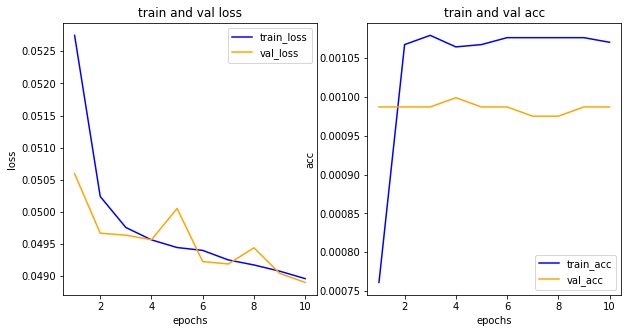

In [ ]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()


plt.show()

반복될수록 loss는 떨어지고, acc는 올라가는걸로 보이나, 그 수치가 말도 안되게 안 좋은 것을 확인 할 수 있다. model.summary()를 보았을 때, model.Dense와 model.compile()을 잘못 한 것으로 보여진다.

4번 문제: 딥러닝 모델에서 Dense층을 개선하여 모델을 작성하시오.
--

In [ ]:
x=train.drop(['wd (deg)'], axis=1)
y=train[['wd (deg)']]

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=seed)

In [ ]:
# 모델 설정
model=Sequential()
model.add(Dense(24, input_dim=13, activation='relu'))
model.add(Dense(12,  activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 24)                336       
_________________________________________________________________
dense_16 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 7         
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습하기
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 50,
                    validation_data = (x_val,y_val))

Epoch 1/10
6728/6728 [==============================] - 17s 2ms/step - loss: 0.0544 - accuracy: 8.1877e-04 - val_loss: 0.0507 - val_accuracy: 9.8704e-04
Epoch 2/10
6728/6728 [==============================] - 15s 2ms/step - loss: 0.0503 - accuracy: 9.6446e-04 - val_loss: 0.0499 - val_accuracy: 9.8704e-04
Epoch 3/10
6728/6728 [==============================] - 15s 2ms/step - loss: 0.0495 - accuracy: 9.6061e-04 - val_loss: 0.0494 - val_accuracy: 9.7515e-04
Epoch 4/10
6728/6728 [==============================] - 16s 2ms/step - loss: 0.0491 - accuracy: 0.0011 - val_loss: 0.0497 - val_accuracy: 9.8704e-04
Epoch 5/10
6728/6728 [==============================] - 16s 2ms/step - loss: 0.0491 - accuracy: 0.0011 - val_loss: 0.0494 - val_accuracy: 9.8704e-04
Epoch 6/10
6728/6728 [==============================] - 16s 2ms/step - loss: 0.0489 - accuracy: 0.0010 - val_loss: 0.0488 - val_accuracy: 9.7515e-04
Epoch 7/10
6728/6728 [==============================] - 15s 2ms/step - loss: 0.0485 - accuracy

In [ ]:
x_test=test.drop(['wd (deg)'], axis=1)
y_test=test[['wd (deg)']]

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
smape(y_test, y_pred)

wd (deg)    50.478116
dtype: float64

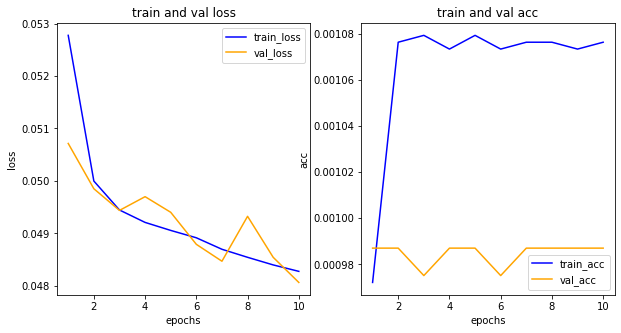

In [ ]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()


plt.show()

- Dense를 수정하기 전과 후는 다음과 같다.

1) Dense 수정 전

model.add(Dense(24, input_dim=13, 

activation='relu'))

model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

2) Dense 수정 후

model.add(Dense(24, input_dim=13, activation='relu'))

model.add(Dense(12,  activation='relu'))

model.add(Dense(6, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

결과가 좋아진 점은

SMAPE이 64.190163에서 50.478116으로 감소했다는 점이다.



5번 문제: 양방향 순환신경망으로 모델을 작성하고 결과를 해석하시오.
--

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pprint import pprint
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras.models import load_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import CuDNNLSTM

In [ ]:
x_train=train.drop(['wd (deg)'], axis=1)
y_train=train[['wd (deg)']]

In [ ]:
x_train=x_train.iloc[-4464:, :]
y_train=y_train.iloc[-4464:, :]

In [ ]:
x_test=test.drop(['wd (deg)'], axis=1)
y_test=test[['wd (deg)']]

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4464, 13)
(4464, 13)
(4464, 1)
(4464, 1)


In [ ]:
maxlen=1
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length = 1))
model.add(Bidirectional(CuDNNLSTM(13)))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1, 128)            1076352   
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 26)                14872     
_________________________________________________________________
dropout_5 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 27        
Total params: 1,091,251
Trainable params: 1,091,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습하기
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 50, validation_data=[x_test, y_test] )

Epoch 1/10
90/90 [==============================] - 4s 17ms/step - loss: 40911.7747 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
90/90 [==============================] - 1s 11ms/step - loss: 40631.8780 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
90/90 [==============================] - 1s 11ms/step - loss: 40731.3780 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
90/90 [==============================] - 1s 11ms/step - loss: 40879.9132 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
90/90 [==============================] - 1s 11ms/step - loss: 40821.5449 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
90/90 [==============================] - 1s 11ms/step - loss: 40808.9026 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
90/90 [==============================] - 1s 11m

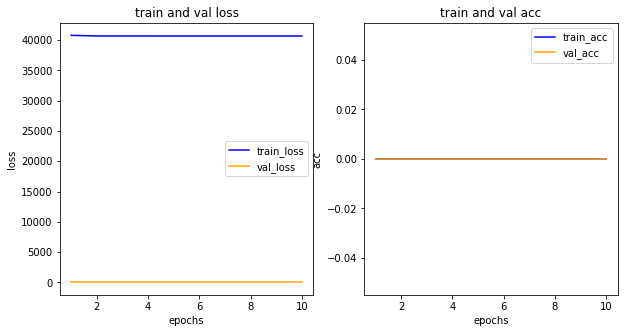

In [ ]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()


plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
smape(y_test, y_pred)

195.88395378100796

일단 돌리는데는 성공했는데, 학습이 하나도 안 된것으로 해석 된다.

# 5번 문제 다시 풀기

In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip /content/jena_climate_2009_2016.csv.zip

In [2]:
import os

f = open('/content/jena_climate_2009_2016.csv')
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

In [3]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [4]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [5]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [6]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [7]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


# 양방향 RNN

In [9]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [10]:
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets
        
train_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step, 
    batch_size=batch_size)
val_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)

In [11]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 22s 30ms/step - loss: 0.4957 - val_loss: 0.4832
Epoch 2/20
500/500 [==============================] - 14s 29ms/step - loss: 0.4535 - val_loss: 0.4678
Epoch 3/20
500/500 [==============================] - 14s 29ms/step - loss: 0.3974 - val_loss: 0.4312
Epoch 4/20
500/500 [==============================] - 14s 29ms/step - loss: 0.3571 - val_loss: 0.3888
Epoch 5/20
500/500 [==============================] - 14s 29ms/step - loss: 0.3284 - val_loss: 0.3809
Epoch 6/20
500/500 [==============================] - 15s 29ms/step - loss: 0.3107 - val_loss: 0.3817
Epoch 7/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2975 - val_loss: 0.3816
Epoch 8/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2855 - val_loss: 0.3718
Epoch 9/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2738 - val_loss: 0.3654
Epoch 10/20
500/500 [==============================] - 14s 29ms/step - loss: 0.268

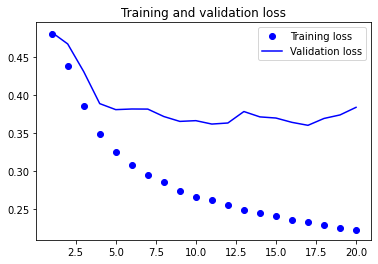

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 방법을 바꾸니까 epoch이 늘어날 수록 training loss와 validation loss가 둘 다 떨어지는 것을 확인 할 수 있다.
